<a href="https://colab.research.google.com/github/EHOVITAUM/Academic_Projects/blob/main/prova_p3_vitor_jose_ferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acesse a base:

https://raw.githubusercontent.com/cedmenezes/estudos/main/diabetes_binary_health_indicators_BRFSS2015.csv

, que contém dados sobre saúde pública, mais especificamente sobre diabetes.

1) (2,0 pontos) Faça uma análise exploratória inicial.
2) (3,0 pontos) Use redução de dimensionalidade para visualizar dados de diabéticos e não-diabéticos.
3) (5,0 pontos) Construa um modelo preditor, comparando a acurácia de 3 modelos diferentes, para a doença diabetes.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cedmenezes/estudos/main/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#ANÁLISE EXPLORATÓRIA DE DADOS

In [5]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
lista1 = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','DiffWalk', 'Sex']

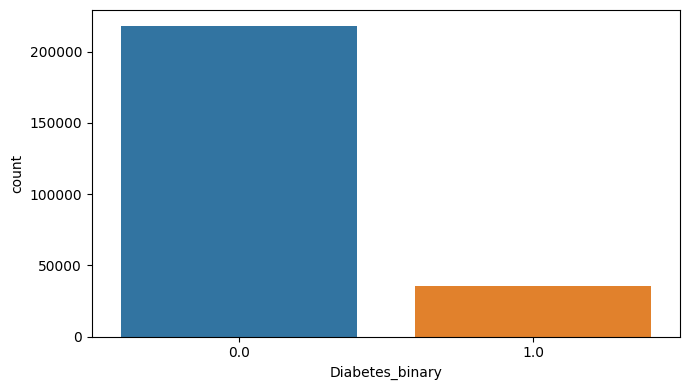

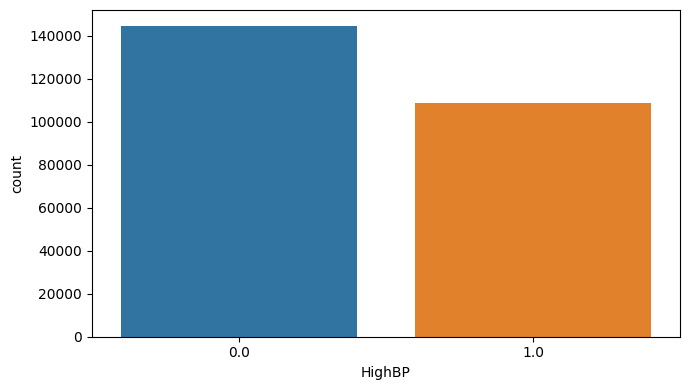

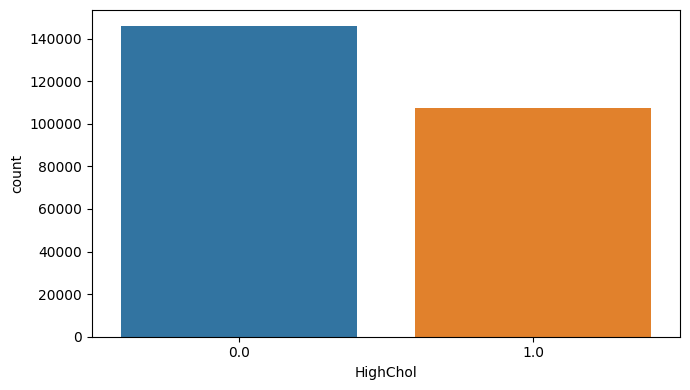

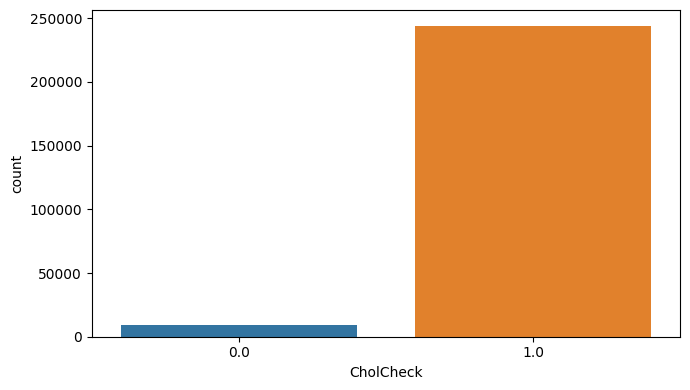

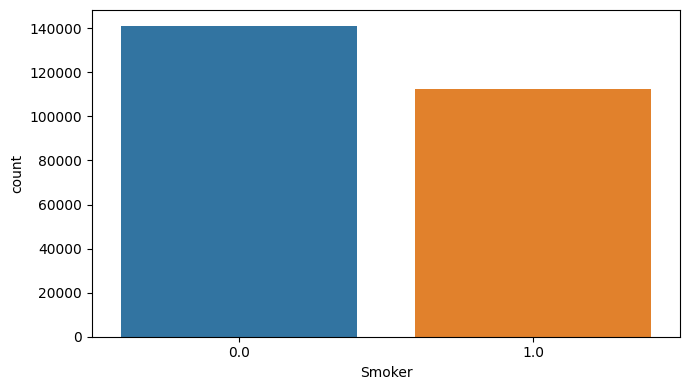

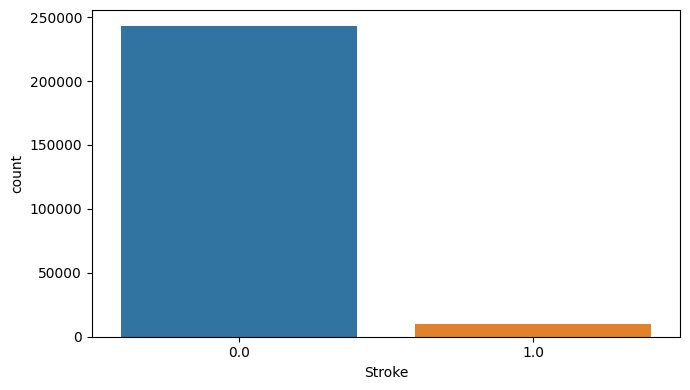

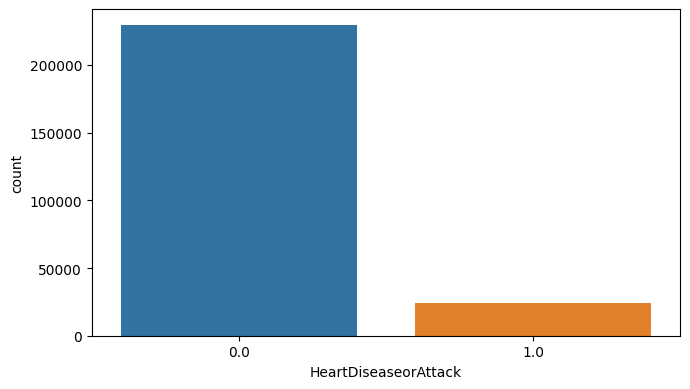

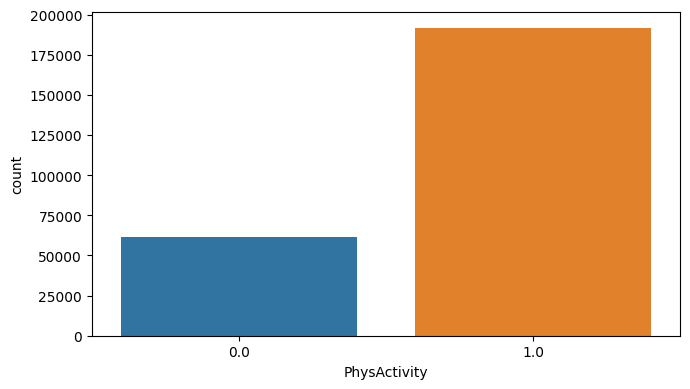

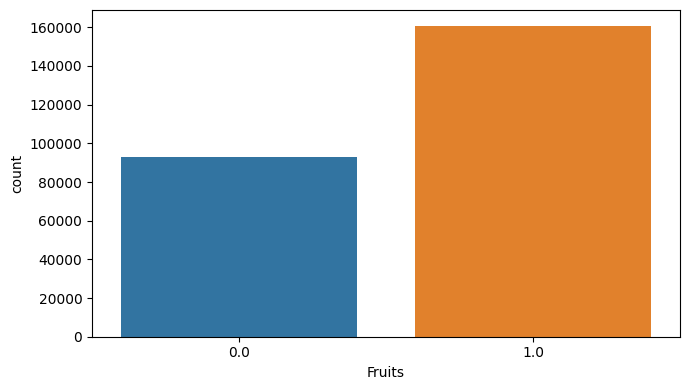

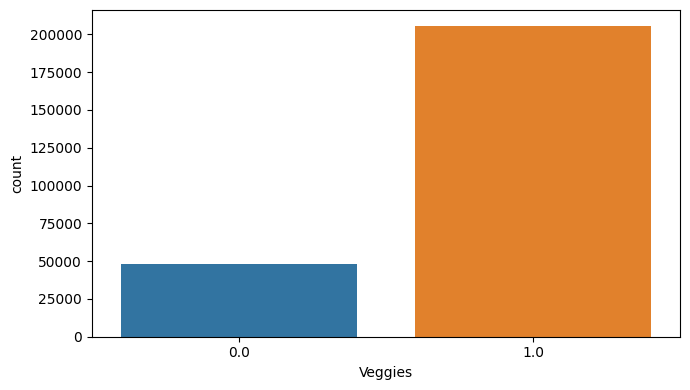

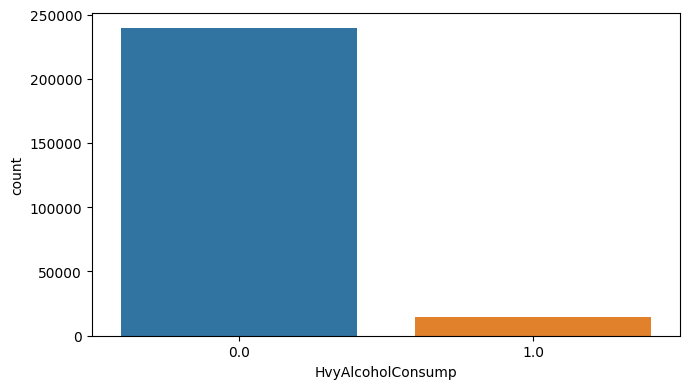

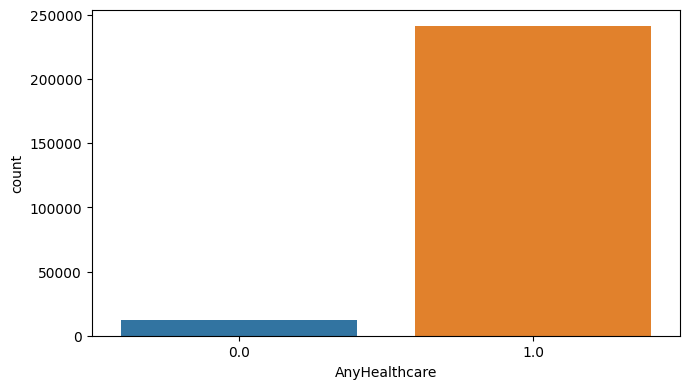

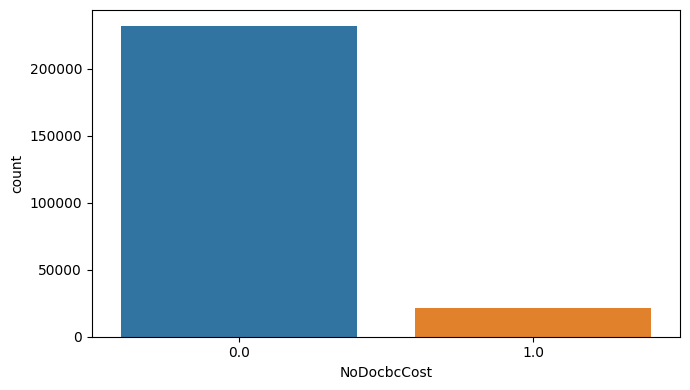

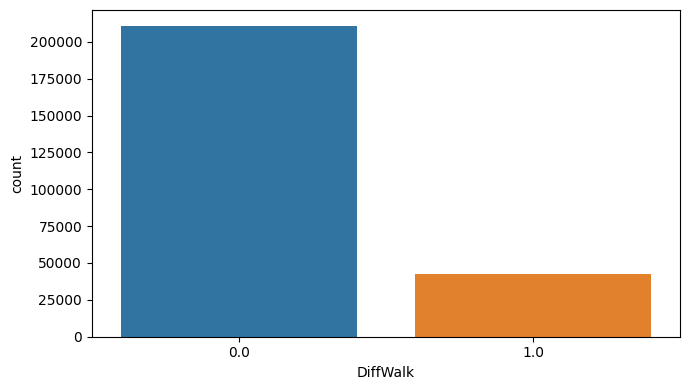

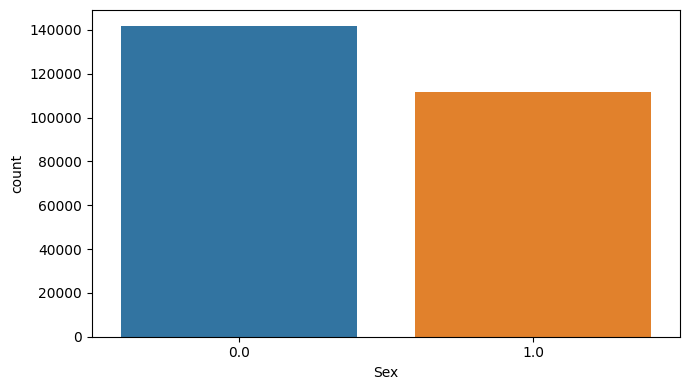

In [7]:
for coluna in lista1:
  fig, _ = plt.subplots(1, figsize=(7,4))
  ax = sns.countplot(x=coluna, data=df)
  fig.tight_layout()

In [8]:
lista2 = ['BMI','GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']

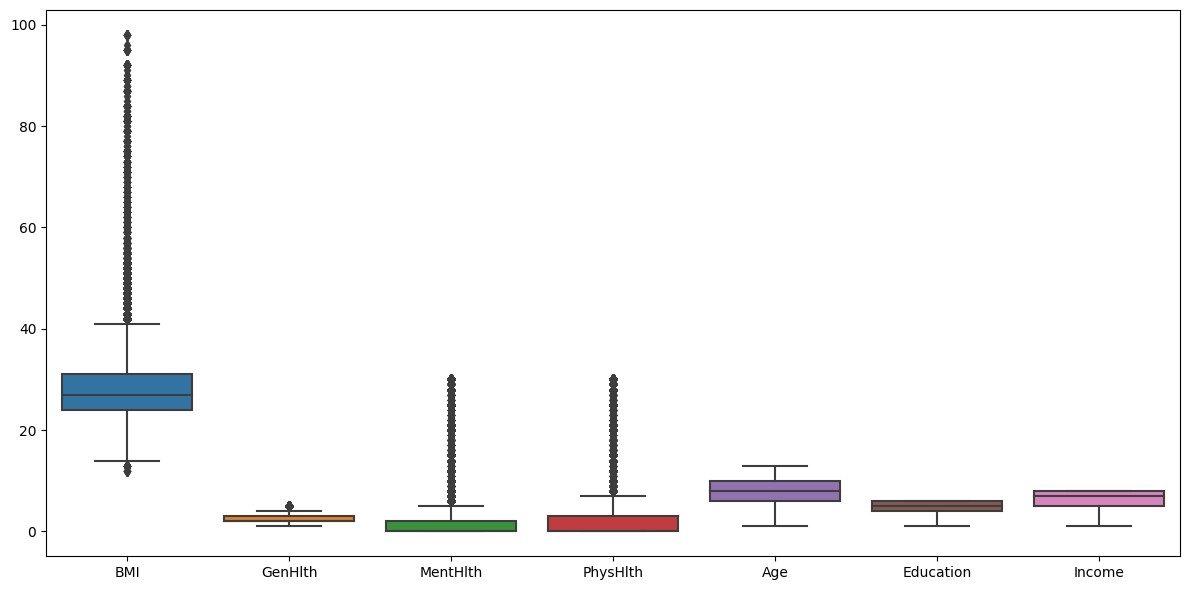

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[lista2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

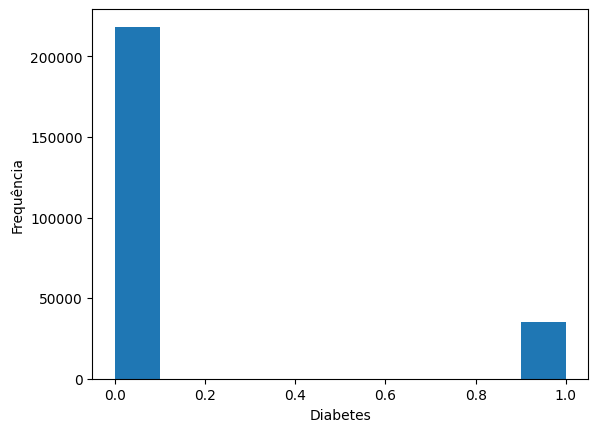

In [10]:
plt.hist(df["Diabetes_binary"])
plt.xlabel("Diabetes")
plt.ylabel("Frequência")
plt.show()
# target desbalnceado ...

In [11]:
# # tentativa de realizar sobreamostragem usando  lib SMOTE ...
# # nao apresenta erro , mas o código só carrega e não compila ...
# from collections import Counter
# print('numero de resgistros 0 e 1 antes da sobreamostragem')
# print(sorted(Counter(df['Diabetes_binary']).items()))

# from imblearn.combine import SMOTETomek
# smote = SMOTETomek(random_state=0)
# x_resampled, y_resampled = smote.fit_resample(     # para nessa linha de código , realiza o primeiro print numero de resgistros 0 e 1 antes da sobreamostragem(0.0, 218334), (1.0, 35346)]
#     df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'])

# print( 'numero de registros 0 e 1 apos a sobreamostragem')
# print(sorted(Counter(y_resampled).items()))

In [12]:
# !pip install --upgrade imblearn


In [13]:
# !pip install imblearn


In [14]:
# !pip uninstall imblearn
# !pip install imblearn


In [15]:
# # tentativa de realizar sobre amostragem com a lib SMOTEENN
# from imblearn.over_sampling import SMOTEENN

# smoteenn = SMOTEENN(random_state=0)
# x_resampled, y_resampled = smoteenn.fit_resample(
#     df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'])

# print( 'numero de registros 0 e 1 apos a sobreamostragem')
# print(sorted(Counter(y_resampled).items()))

#Redução de dimensionalidade

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_reduced = pca.fit_transform(df.drop("Diabetes_binary", axis=1))


In [17]:
print(pca)

PCA(n_components=4)


In [18]:
# PCA = pca
# PCA = pd.DataFrame
# print(PCA)

In [19]:
# treinamento SEM dimensões reduzidas
X_train, X_test, y_train, y_test = train_test_split(df.drop("Diabetes_binary", axis=1), df["Diabetes_binary"], test_size=0.25)

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
mlp_model = MLPClassifier(hidden_layer_sizes=(30, 30))


lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)


lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)


print("ACURACIA REGRESSAO LOGISTICA :", lr_accuracy)
print("ACURACIA DECISION TREE:", dt_accuracy)
print("ACURACIA MLP:", mlp_accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACURACIA REGRESSAO LOGISTICA : 0.8603437401450647
ACURACIA DECISION TREE: 0.7950488804793441
ACURACIA MLP: 0.8657678965625986


In [20]:
#treinamento COM dimesoes reduzidas
X_train, X_test, y_train, y_test = train_test_split(X_reduced, df["Diabetes_binary"], test_size=0.25)

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
mlp_model = MLPClassifier(hidden_layer_sizes=(30, 30)) #treinamento com 30 neuronios em cada camada performou  minimamente melhor...

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("ACURACIA REGRESSAO LOGISTICA :", lr_accuracy)
print("ACURACIA DECISION TREE:", dt_accuracy)
print("ACURACIA MLP:", mlp_accuracy)


ACURACIA REGRESSAO LOGISTICA : 0.8574266792809839
ACURACIA DECISION TREE: 0.7948754336171555
ACURACIA MLP: 0.8596184169031851


In [21]:
# regressão logistica apresentou desempenho minimamente pior após redução de dimensionalidade 7 -> 3
# não houve alterações interessantess de 7 -> 4 dimensões
# modelos performaram menos , apos a redução de dimensionalidade

In [22]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [23]:
#padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_padronizado = scaler.fit_transform(df.drop(columns=['Diabetes_binary']))

df_padronizado.ndim

2

In [24]:
df_padronizado

array([[ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.33793279,
         0.96327159, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.86678537, -0.85818163,  0.19692156, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [ 1.15368814, -0.85818163,  0.19692156, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
         0.96327159, -1.95731247]])

In [25]:
df1 = df

In [26]:
df1 = df1.drop(columns='Diabetes_binary',axis=1 )

In [27]:
df1

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [28]:
df_padronizado = pd.DataFrame(df_padronizado, columns=df1.columns)

df_padronizado

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813
253676,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,...,0.226863,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662
253677,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,...,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312
253678,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138


In [29]:
df_padronizado = pd.concat([df_padronizado, df["Diabetes_binary"]], axis=1)
df_padronizado

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487,0.0
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138,0.0
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638,0.0
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012,0.0
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813,0.0
253676,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,...,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662,1.0
253677,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,...,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312,0.0
253678,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138,0.0


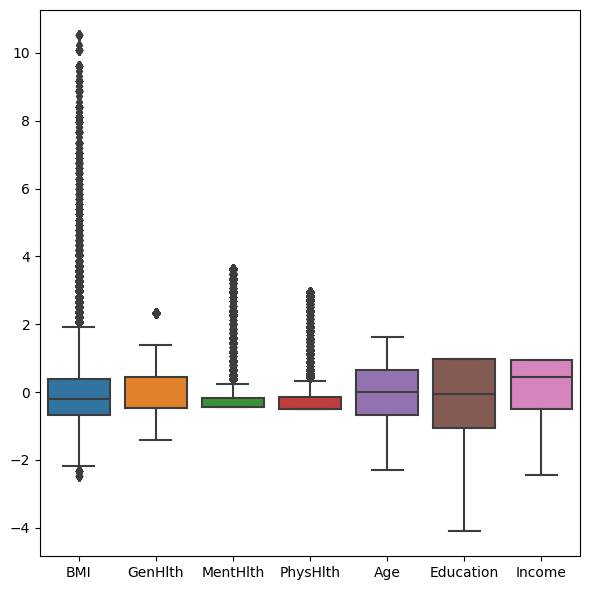

In [30]:
# comparação dados padronizados
lista2 = ['BMI','GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_padronizado[lista2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

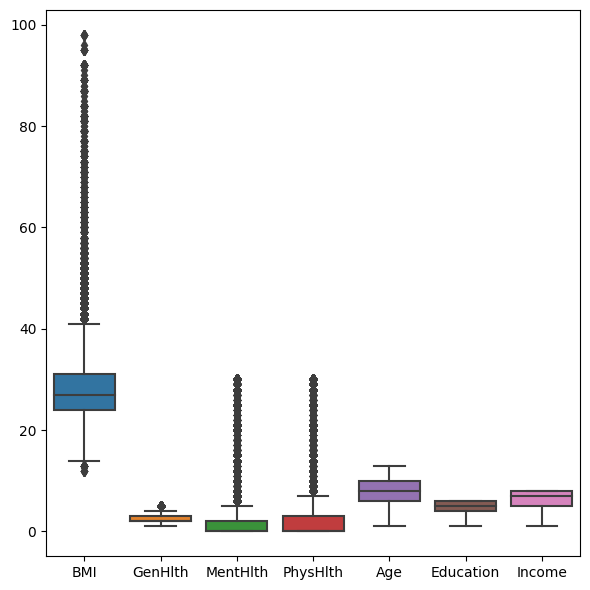

In [31]:
# dados nao padronizados
lista2 = ['BMI','GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[lista2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_padronizado.drop("Diabetes_binary", axis=1), df_padronizado["Diabetes_binary"], test_size=0.15)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Acurácia da regressão logística:", lr_accuracy)



Acurácia da regressão logística: 0.8637128140439398


In [33]:
# o modelo performou minimamente melhor , após normalização dos dados 86,20% -> 86,29%

In [34]:
norm = MinMaxScaler().fit(df)
df_normalizado = norm.transform(df)
df_normalizado

array([[0.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [35]:
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [36]:
df_normalizado

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,0.0,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [37]:
df_normalizado.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982
std,0.346294,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,0.000000,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


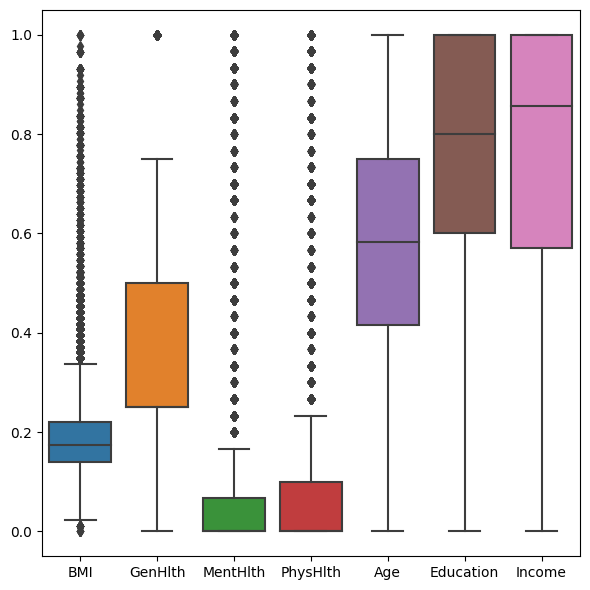

In [38]:
# comparação dados padronizados
lista2 = ['BMI','GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_normalizado[lista2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_normalizado.drop("Diabetes_binary", axis=1), df_normalizado["Diabetes_binary"], test_size=0.15)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Acurácia da regressão logística:", lr_accuracy)


Acurácia da regressão logística: 0.8632397771470619


              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     32724
         1.0       0.54      0.16      0.24      5328

    accuracy                           0.86     38052
   macro avg       0.71      0.57      0.58     38052
weighted avg       0.83      0.86      0.83     38052

[[32008   716]
 [ 4488   840]]


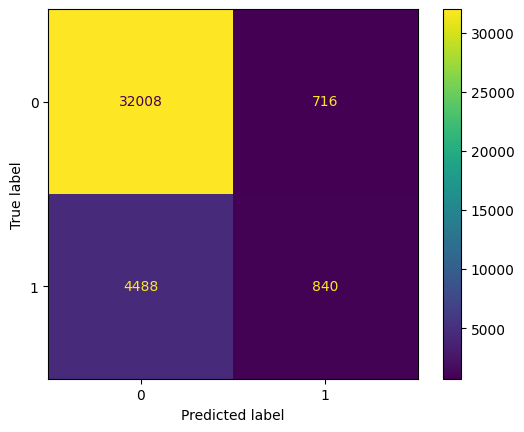

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(y_test , lr_predictions))
#imprimindo matriz de confusao
conf_mat = confusion_matrix(y_test , lr_predictions)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()